# EDA

In [1]:
%reload_ext autoreload
%autoreload 2

# check if working in colab
try:
    # In colab
    from google.colab import drive
    drive.mount('/content/drive')

    %cd /content/drive/MyDrive/projects/paris-traffic-forecast
    %pip install -q darts

except:
    # In local
    # replace with your path
    %cd ..

/mnt/d/Google Drive/projects/paris-traffic-forecast


In [2]:
# Import libraries
import matplotlib.pyplot as plt

## Champs elysées 2014-2020

### load data

In [ ]:
# read txt files from folder
from tqdm import tqdm
import glob
import pandas as pd
# Get folder path containing text files
file_list = glob.glob("data/opendata_txt_*/*.txt")

useful_columns = ["libelle", "libelle_nd_amont", "libelle_nd_aval", "t_1h", "q", "k"] # drop rows with these missing values
keep_columns = useful_columns + ["etat_barre"]

# select arcs to filter by
amont = ["Av_Champs_Elysees-Washington"]
aval = ["Av_Champs_Elysees-Berri"]


all_df = pd.DataFrame()
for file_path in tqdm(file_list):
    df =  pd.read_csv(file_path, delimiter=";")
    df = df[keep_columns]
    # drop rows where q or k is null
    df.dropna(subset=useful_columns, inplace=True)
    for amont_arc, aval_arc in zip(amont, aval):
        # filter by amont and aval arcs
        df = df[(df["libelle_nd_amont"] == amont_arc) & (df["libelle_nd_aval"] == aval_arc)]
        all_df = all_df.append(df)
    
all_df.rename(columns={"libelle": "arc", "libelle_nd_amont": "noeud_amont", "libelle_nd_aval": "noeud_aval", "q":"debit", "k":"occupation", "t_1h":"time"}, inplace=True)
all_df.drop_duplicates(subset=["arc", "noeud_amont", "noeud_aval", "time"], keep="first", inplace=True)
all_df

100%|██████████| 437/437 [17:44<00:00,  2.44s/it]


,iu_ac,arc,iu_nd_amont,noeud_amont,iu_nd_aval,noeud_aval,time,debit,occupation,etat_trafic,etat_barre,dessin
57768,4264,AV_Champs_Elysees,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,2014-01-01 01:00:00,4.0,0.00000,1,3,"""<PLINE><PT X=""""597401"""" Y=""""130149""""/><PT X=""..."
57769,4264,AV_Champs_Elysees,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,2014-01-01 02:00:00,21.0,0.10445,1,3,"""<PLINE><PT X=""""597401"""" Y=""""130149""""/><PT X=""..."
57770,4264,AV_Champs_Elysees,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,2014-01-01 03:00:00,417.0,6.12667,1,3,"""<PLINE><PT X=""""597401"""" Y=""""130149""""/><PT X=""..."
57771,4264,AV_Champs_Elysees,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,2014-01-01 04:00:00,1089.0,14.39890,1,3,"""<PLINE><PT X=""""597401"""" Y=""""130149""""/><PT X=""..."
57772,4264,AV_Champs_Elysees,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,2014-01-01 05:00:00,943.0,10.35220,1,3,"""<PLINE><PT X=""""597401"""" Y=""""130149""""/><PT X=""..."
...,...,...,...,...,...,...,...,...,...,...,...,...
180139,4264,Av_des_Champs_Elysees,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,2020-12-31 20:00:00,728.0,18.19389,2,3,"""<PLINE><PT X=""""597401"""" Y=""""130149""""/><PT X=""..."
180140,4264,Av_des_Champs_Elysees,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,2020-12-31 21:00:00,297.0,4.60278,1,3,"""<PLINE><PT X=""""597401"""" Y=""""130149""""/><PT X=""..."
180141,4264,Av_des_Champs_Elysees,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,2020-12-31 22:00:00,132.0,2.61889,1,3,"""<PLINE><PT X=""""597401"""" Y=""""130149""""/><PT X=""..."
180142,4264,Av_des_Champs_Elysees,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,2020-12-31 23:00:00,106.0,1.60722,1,3,"""<PLINE><PT X=""""597401"""" Y=""""130149""""/><PT X=""..."


In [ ]:
# select arcs to work with
amont = ["Av_Champs_Elysees-Washington"]
aval = ["Av_Champs_Elysees-Berri"]

df = pd.DataFrame()
for amont_arc, aval_arc in zip(amont, aval):
    # filter by amont and aval arcs
    df = df.append(all_df[(all_df["noeud_amont"] == amont_arc) & (all_df["noeud_aval"] == aval_arc)])
print(df['arc'].unique())
# df.drop_duplicates(inplace=True)
df

['AV_Champs_Elysees' 'Av_des_Champs_Elysees']


,arc,noeud_amont,noeud_aval,debit,occupation,time,etat_barre
57768,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,4.0,0.00000,2014-01-01 01:00:00,3
57769,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,21.0,0.10445,2014-01-01 02:00:00,3
57770,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,417.0,6.12667,2014-01-01 03:00:00,3
57771,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,1089.0,14.39890,2014-01-01 04:00:00,3
57772,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,943.0,10.35220,2014-01-01 05:00:00,3
...,...,...,...,...,...,...,...
180139,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,728.0,18.19389,2020-12-31 20:00:00,3
180140,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,297.0,4.60278,2020-12-31 21:00:00,3
180141,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,132.0,2.61889,2020-12-31 22:00:00,3
180142,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,106.0,1.60722,2020-12-31 23:00:00,3


In [ ]:
import pandas as pd
time_col = "time"
value_cols = ['debit', "occupation", "etat_barre"]
# set datetime index
# df[time_col] = pd.to_datetime(df[time_col], utc=True).dt.tz_localize(None)
df[time_col] = pd.to_datetime(df[time_col])
df[time_col] = pd.DatetimeIndex(df[time_col])
df = df.set_index(time_col)
df

In [ ]:
df.iloc[0]

arc                       AV_Champs_Elysees
noeud_amont    Av_Champs_Elysees-Washington
noeud_aval          Av_Champs_Elysees-Berri
debit                                   4.0
occupation                              0.0
etat_barre                                3
Name: 2014-01-01 01:00:00, dtype: object

In [ ]:
df.iloc[-1]

arc                   Av_des_Champs_Elysees
noeud_amont    Av_Champs_Elysees-Washington
noeud_aval          Av_Champs_Elysees-Berri
debit                                  91.0
occupation                             1.39
etat_barre                                3
Name: 2021-01-01 00:00:00, dtype: object

In [ ]:
df.describe()

,debit,occupation,etat_barre
count,56508.000000,56508.000000,56508.000000
mean,1176.266422,9.777808,2.984746
std,626.625957,7.959710,0.122564
min,0.000000,0.000000,2.000000
25%,661.000000,4.779450,3.000000
50%,1145.000000,8.486945,3.000000
75%,1704.000000,11.448300,3.000000
max,6530.000000,84.668890,3.000000


In [ ]:
from darts import TimeSeries

# transform data to TimeSeries
ts = TimeSeries.from_dataframe(df, 
                          value_cols=value_cols,
                          fill_missing_dates=True,
                          freq='H'
                          )
ts

<TimeSeries (DataArray) (time: 61368, component: 3, sample: 1)>
array([[[4.00000e+00],
        [0.00000e+00],
        [3.00000e+00]],

       [[2.10000e+01],
        [1.04450e-01],
        [3.00000e+00]],

       [[4.17000e+02],
        [6.12667e+00],
        [3.00000e+00]],

       ...,

       [[1.32000e+02],
        [2.61889e+00],
        [3.00000e+00]],

       [[1.06000e+02],
        [1.60722e+00],
        [3.00000e+00]],

       [[9.10000e+01],
        [1.39000e+00],
        [3.00000e+00]]])
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01T01:00:00 ... 2021-01-01
  * component  (component) object 'debit' 'occupation' 'etat_barre'
Dimensions without coordinates: sample

#### débit horaire

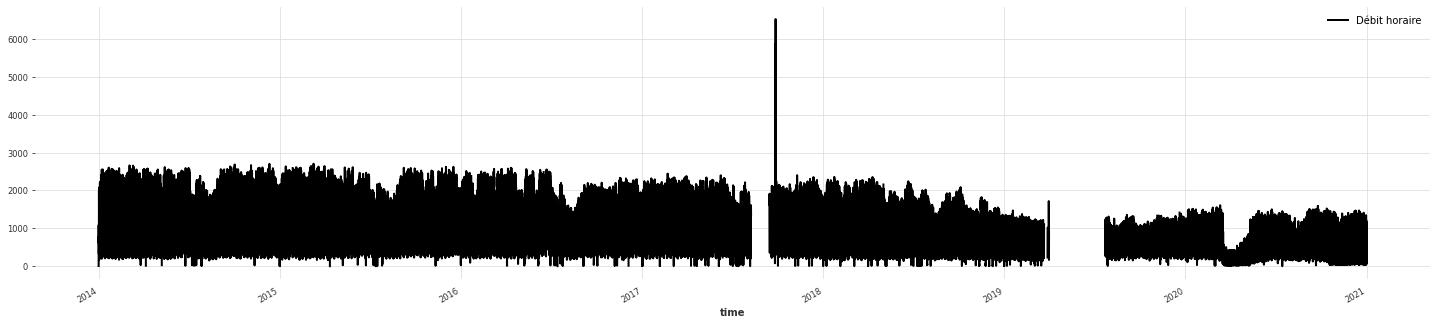

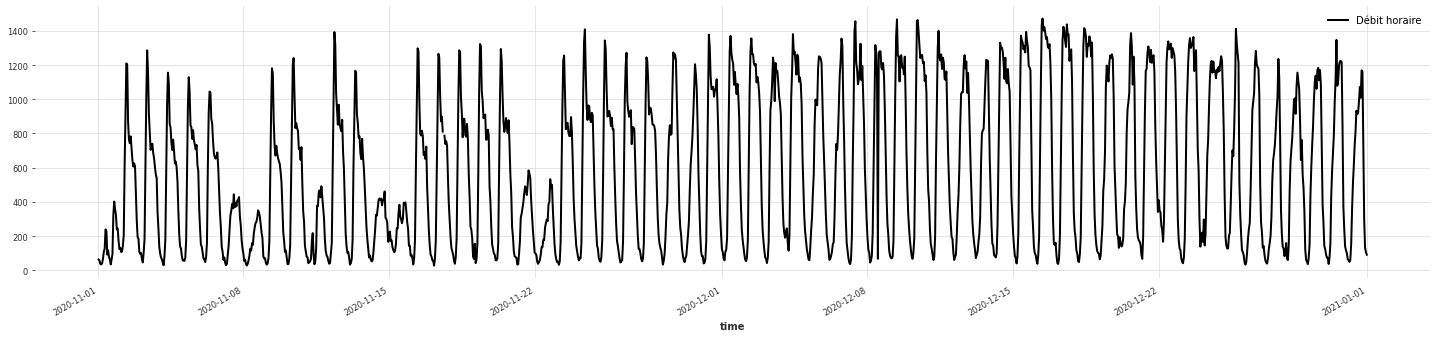

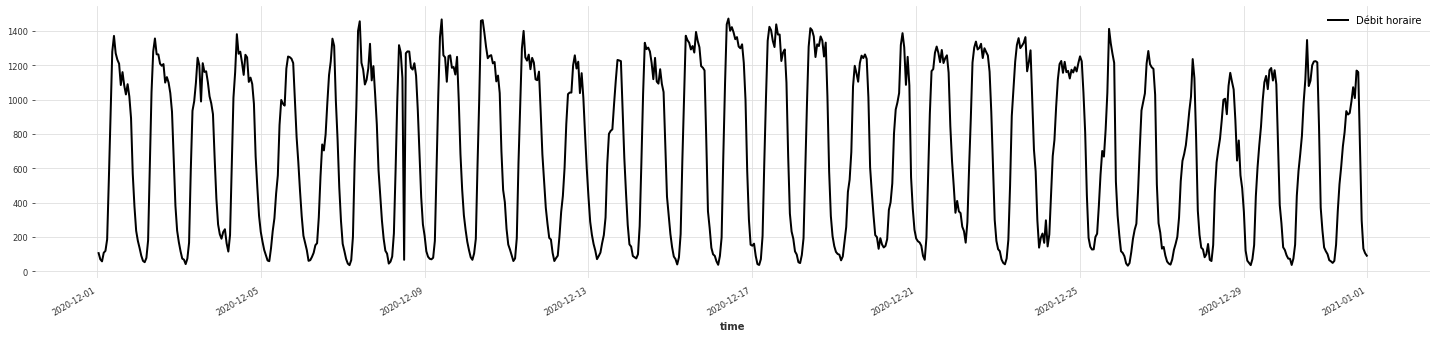

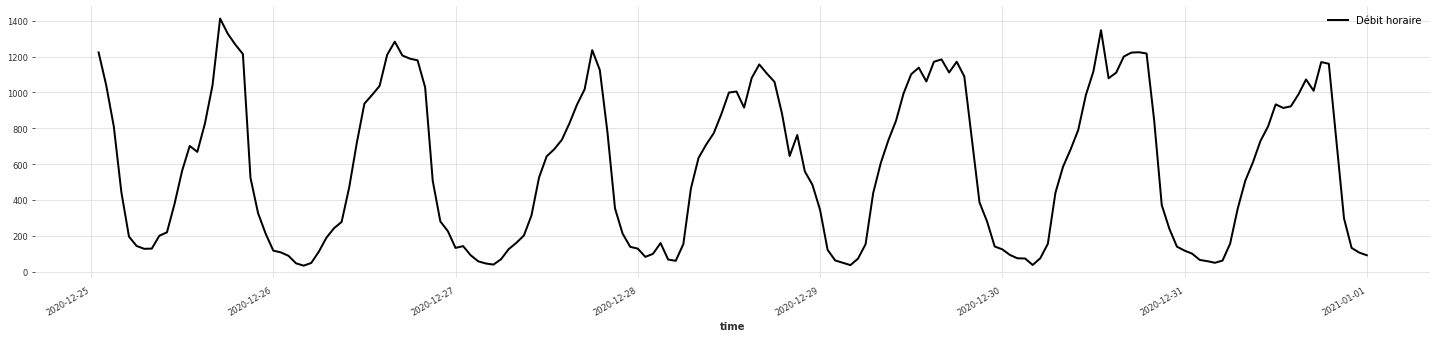

In [ ]:
plt.rcParams['figure.figsize'] = [25, 5]
ts.univariate_component(0).plot(label='Débit horaire')
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

#### taux d'occupation

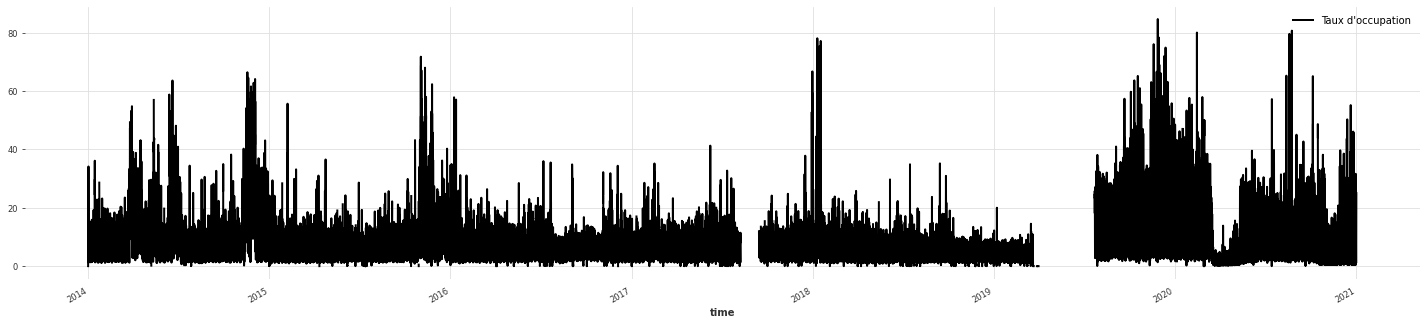

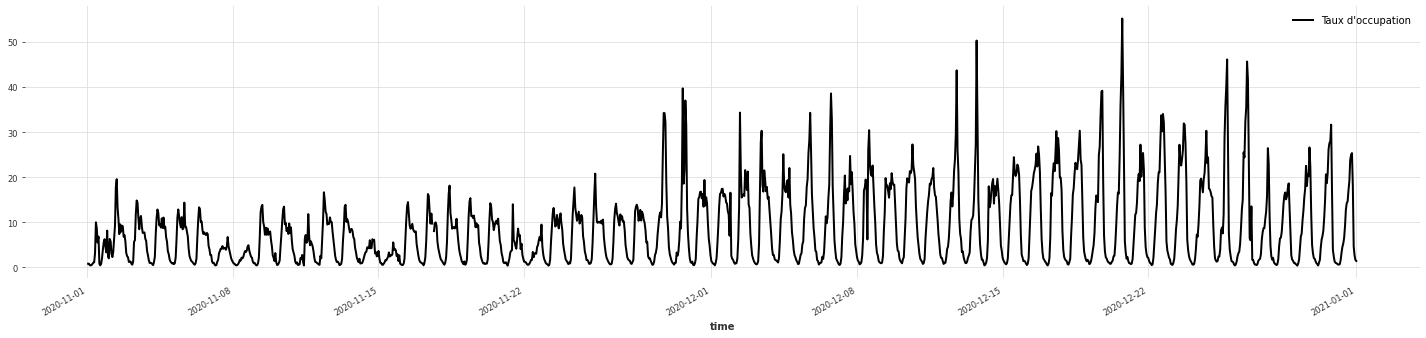

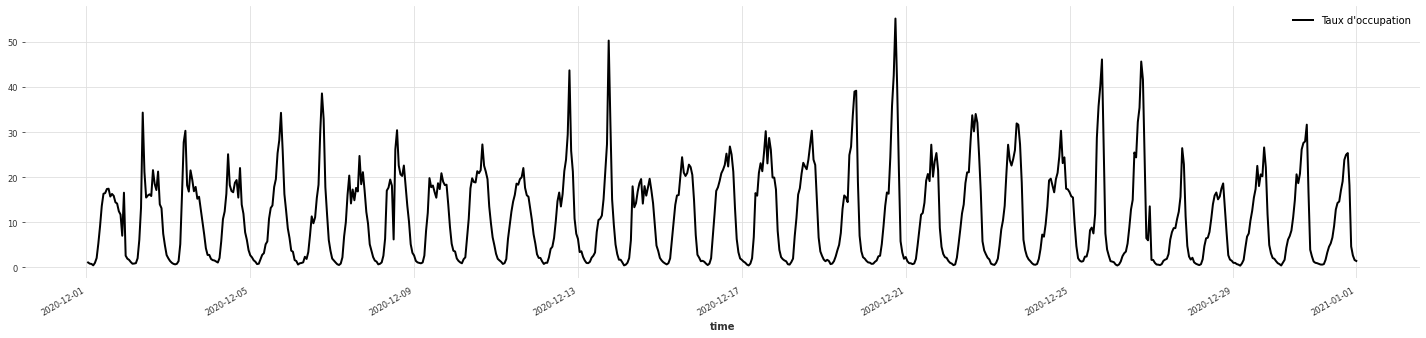

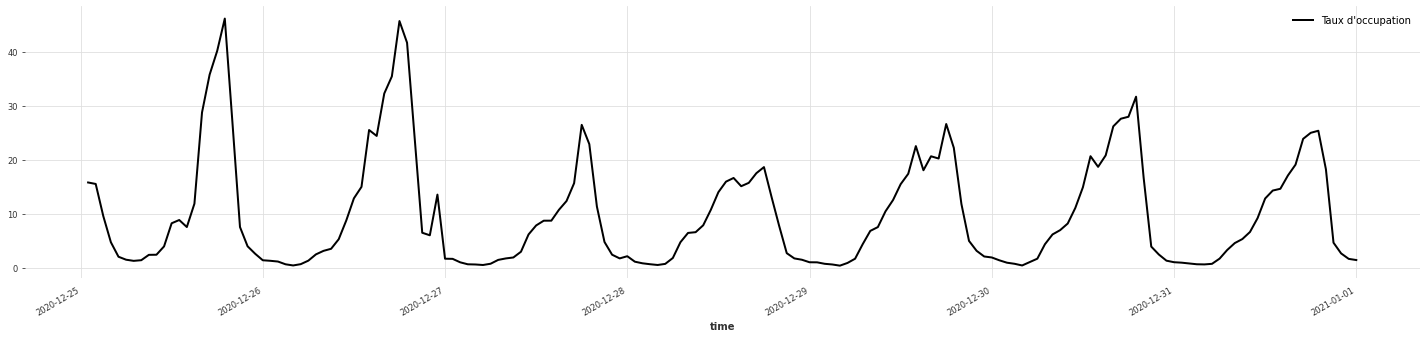

In [ ]:
# plot component of index 0 after 2021-11-04 
ts.univariate_component(1).plot(label="Taux d'occupation")
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)

#### effet etat_barre

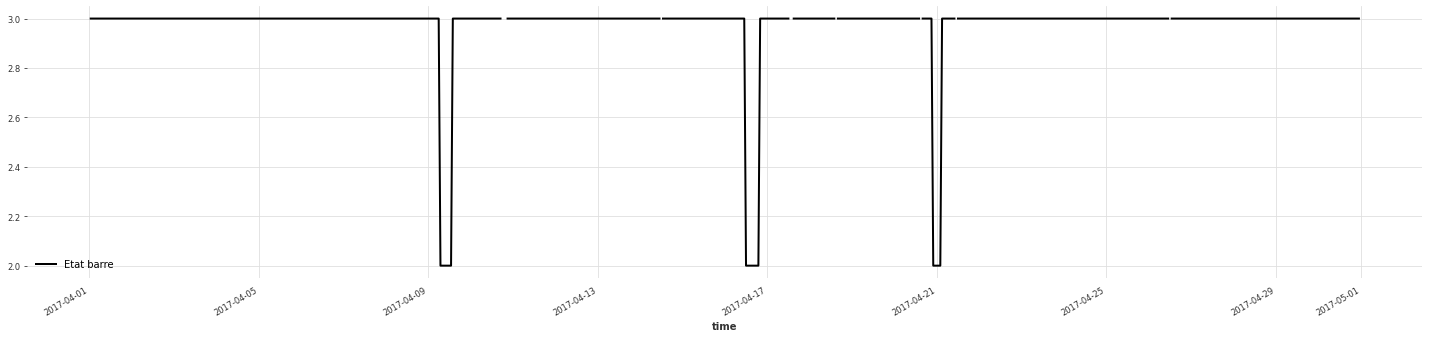

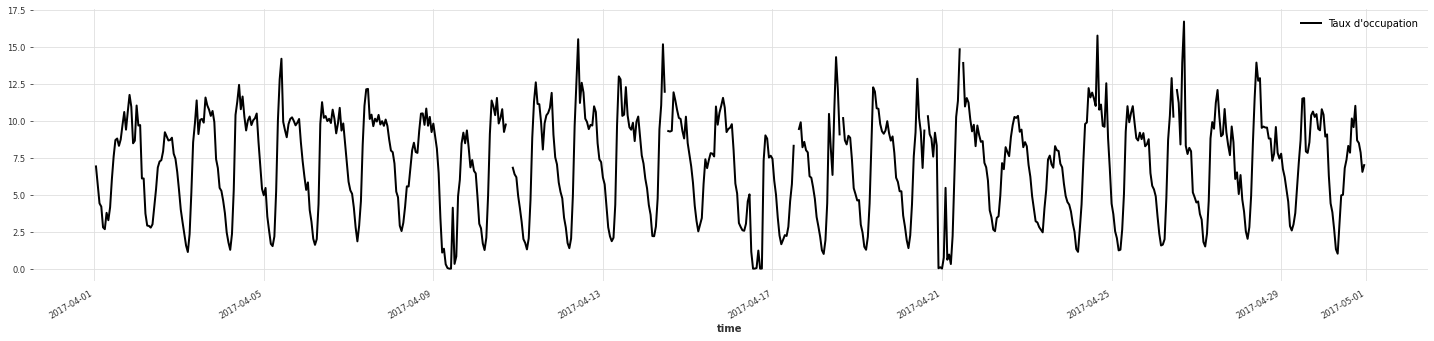

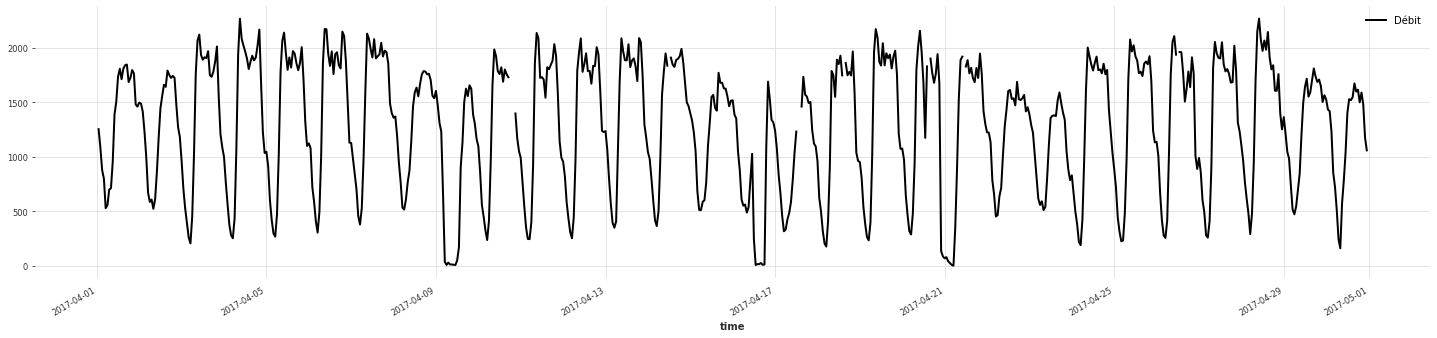

In [ ]:
ts.univariate_component(2).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Etat barre")
ts.univariate_component(1).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Taux d'occupation", new_plot=True)
ts.univariate_component(0).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Débit", new_plot=True)


Saisonnalités:
* chaque année ?
* chaque mois
* chaque jour

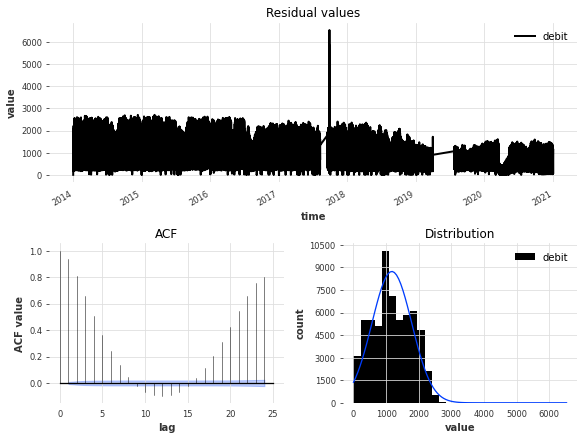

In [ ]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis, plot_hist, extract_trend_and_seasonality
plot_residuals_analysis(ts.univariate_component(0), num_bins=30)

In [ ]:
df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2014-01-01 01:00:00,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,4.0,0.00000,3
2014-01-01 02:00:00,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,21.0,0.10445,3
2014-01-01 03:00:00,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,417.0,6.12667,3
2014-01-01 04:00:00,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,1089.0,14.39890,3
2014-01-01 05:00:00,AV_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,943.0,10.35220,3
...,...,...,...,...,...,...
2020-12-31 20:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,728.0,18.19389,3
2020-12-31 21:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,297.0,4.60278,3
2020-12-31 22:00:00,Av_des_Champs_Elysees,Av_Champs_Elysees-Washington,Av_Champs_Elysees-Berri,132.0,2.61889,3


In [ ]:
# save df
df.to_csv("data/champs_elysees-2014-2020.csv")

### fill missing values

In [ ]:
ts = ts_orig

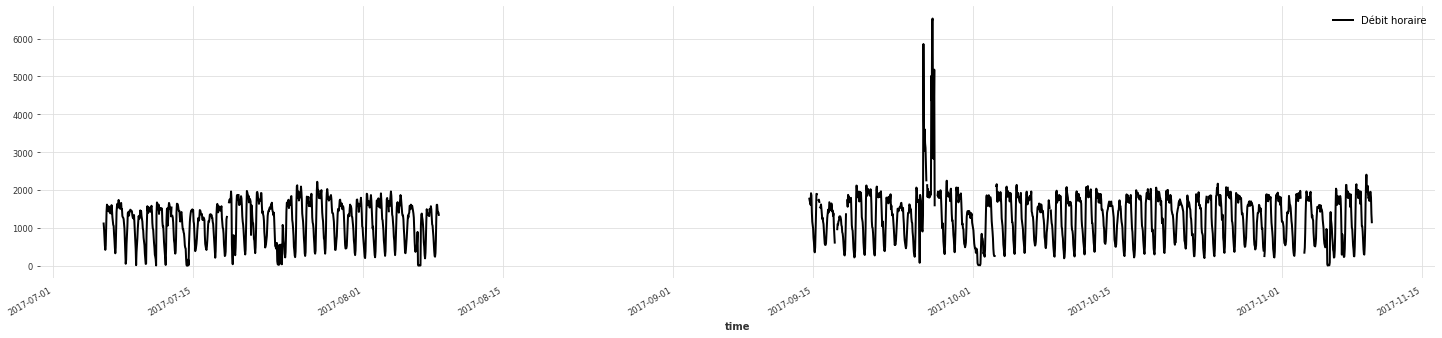

In [ ]:
tdf = ts.pd_dataframe()
ts.drop_before(pd.Timestamp("2017-07-06")).drop_after(pd.Timestamp("2017-11-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [ ]:
tdf.interpolate(method='linear', limit=3, inplace=False).isna().sum()

component
debit         4407
occupation    4407
etat_barre    4407
dtype: int64

In [ ]:
# fill missing values in tdf (only 3 consecutive hours)
tdf.interpolate(method='linear', limit=3, inplace=True)
tdf.isna().sum()

component
debit         4149
occupation    4149
etat_barre    4149
dtype: int64

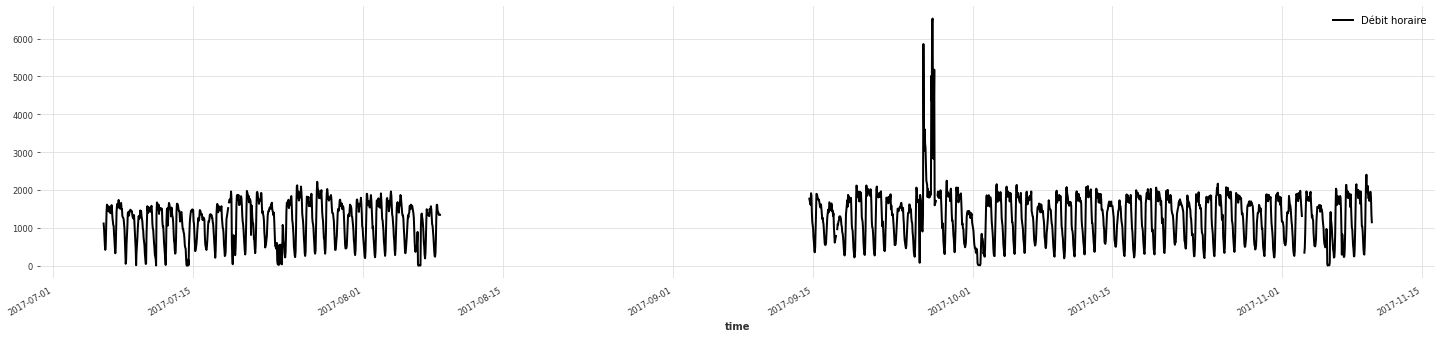

In [ ]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2017-07-06")).drop_after(pd.Timestamp("2017-11-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

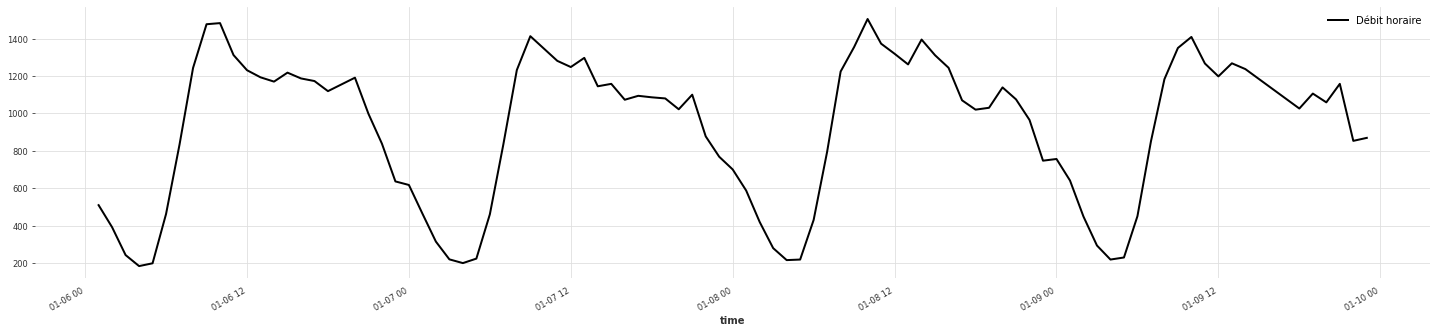

In [ ]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2020-01-06")).drop_after(pd.Timestamp("2020-01-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [ ]:
# fill missing values in tdf
tdf.interpolate(method='linear', inplace=True)
tdf.isna().sum()

component
debit         0
occupation    0
dtype: int64

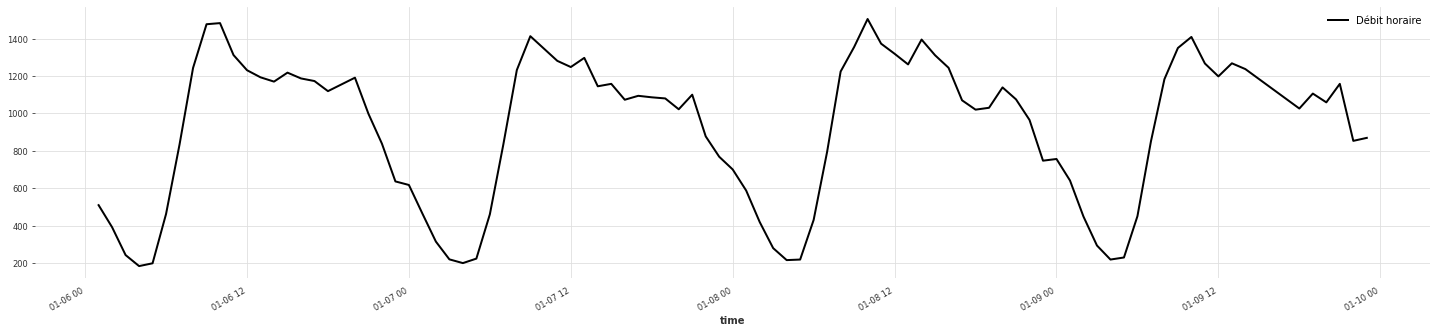

In [ ]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2020-01-06")).drop_after(pd.Timestamp("2020-01-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [ ]:
tdf = ts.pd_dataframe()
tdf.to_csv("data/champs_elysees-2014-2020-proc.csv")

## Sts_peres

### load data

In [ ]:
# read txt files from folder
from tqdm import tqdm
import glob
import pandas as pd
# Get folder path containing text files
file_list = glob.glob("data/opendata_txt_*/*.txt")

useful_columns = ["libelle", "libelle_nd_amont", "libelle_nd_aval", "t_1h", "q", "k"] # drop rows with these missing values
keep_columns = useful_columns + ["etat_barre"]

# select arcs to filter by
# amont = ["Lecourbe-Convention", "Sts_Peres-Voltaire"]
# aval = ["Convention-Blomet", "Sts_Peres-Universite"]
amont_aval = [['Av_Champs_Elysees-Washington', 'Av_Georges_V-Place_Dunant'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Av_Champs_Elysees-Dutuit'],
 ['Av_Champs_Elysees-Colisee', 'Rond_Point_Champs_Elysees'],
 ['Av_Champs_Elysees-La_Boetie', 'Av_Champs_Elysees-Berri'],
 ['Concorde_Ouest', 'Pl_Concorde-Av_Champs_Elysees'],
 ['Av_Champs_Elysees-Berri', 'Av_Champs_Elysees-Washington'],
 ['Av_Champs_Elysees-Face_Air_Franc', 'Av_Champs_Elysees-Balzac'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Cours_la_Reine-Concorde'],
 ['Champs-Tilsitt', 'Av_Champs_Elysees-Face_Air_Franc'],
 ['Cours_la_Reine-Concorde', 'Sortie_Souterrain_Champs_Elysees'],
 ['Sortie_Souterrain_Champs_Elysees', 'Tuileries-Sedar_Senghor'],
 ['Av_Champs_Elysees-Face_Air_Franc', 'Grande_Armee-Forge'],
 ['Av_Champs_Elysees-Clemenceau', 'Rond_Point_Champs_Elysees'],
 ['Rond_Point_Champs_Elysees', 'Av_Champs_Elysees-Clemenceau'],
 ['Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'],
 ['Av_Champs_Elysees-Colisee', 'Av_Champs_Elysees-La_Boetie'],
 ['Av_Champs_Elysees-Dutuit', 'Av_Champs_Elysees-Clemenceau'],
 ['Rond_Point_Champs_Elysees', 'Av_Champs_Elysees-Colisee'],
 ['Av_Champs_Elysees-Balzac', 'Av_Champs_Elysees-Washington'],
 ['Av_Champs_Elysees-Berri', 'Av_Champs_Elysees-La_Boetie'],
 ['Av_Georges_V-Place_Dunant', 'Av_Champs_Elysees-Washington']]

amont_aval += [['Convention-St_Charles', 'Convention-Lourmel'],
 ['Convention-Felix_Faure', 'Convention-Nivert'],
 ['Convention-Lourmel', 'Convention-St_Charles'],
 ['Convention-Blomet', 'Convention-Vaugirard'],
 ['Convention-St_Charles', 'Convention-Gutemberg'],
 ['Convention-Felix_Faure', 'Convention-Lourmel'],
 ['Convention-Lourmel', 'Convention-Felix_Faure'],
 ['Convention-Nivert', 'Convention-Felix_Faure'],
 ['Faure-Javel', 'Convention-Felix_Faure'],
 ['Convention-Gutemberg', 'Convention-St_Charles'],
 ['Convention-Nivert', 'Lecourbe-Convention'],
 ['Convention-Gutemberg', 'Rond_Point_Mirabeau'],
 ['Convention-Vaugirard', 'Convention-Olivier_de_Serres'],
 ['Convention-Felix_Faure', 'Faure-Javel'],
 ['Lecourbe-Convention', 'Convention-Nivert'],
 ['Rond_Point_Mirabeau', 'Convention-Gutemberg'],
 ['Lecourbe-Convention', 'Convention-Blomet'],
 ['Convention-Olivier_de_Serres', 'Place_Charles_Valin'],
 ['Lecourbe-Convention', 'Lecourbe-Croix-Nivert']]

amont_aval += [['Sevres-Babylone', 'Sevres-Sts_Peres'],
 ['Sts_Peres-Voltaire', 'Sts_Peres-Universite'],
 ['Bd_St_Germain-St_Guillaume', 'Bd_St_Germain-Sts_Peres'],
 ['Sts_Peres-Grenelle', 'Sevres-Sts_Peres'],
 ['Sts_Peres-Universite', 'Bd_St_Germain-Sts_Peres'],
 ['Malaquais-Bonaparte', 'Sts_Peres-Voltaire'],
 ['Bd_St_Germain-Sts_Peres', 'Sts_Peres-Grenelle'],
 ['Bd_St_Germain-Sts_Peres', 'Bd_St_Germain-Dragon']]

all_df = pd.DataFrame()
for file_path in tqdm(file_list):
    df =  pd.read_csv(file_path, delimiter=";")
    df = df[keep_columns]
    # drop rows where q or k is null
    df.dropna(subset=useful_columns, inplace=True)
    for amont_arc, aval_arc in amont_aval:
        # filter by amont and aval arcs
        all_df = all_df.append(df[(df["libelle_nd_amont"] == amont_arc) & (df["libelle_nd_aval"] == aval_arc)], ignore_index=True)
    
all_df.rename(columns={"libelle": "arc", "libelle_nd_amont": "noeud_amont", "libelle_nd_aval": "noeud_aval", "q":"debit", "k":"occupation", "t_1h":"time"}, inplace=True)
all_df.drop_duplicates(subset=["arc", "noeud_amont", "noeud_aval", "time"], keep="first", inplace=True)
all_df

100%|██████████| 437/437 [41:26<00:00,  5.69s/it]


,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
0,Av_Georges_V,Av_Champs_Elysees-Washington,Av_Georges_V-Place_Dunant,2014-01-01 01:00:00,29.0,0.70667,3
1,Av_Georges_V,Av_Champs_Elysees-Washington,Av_Georges_V-Place_Dunant,2014-01-01 02:00:00,16.0,0.35000,3
2,Av_Georges_V,Av_Champs_Elysees-Washington,Av_Georges_V-Place_Dunant,2014-01-01 03:00:00,105.0,0.70722,3
3,Av_Georges_V,Av_Champs_Elysees-Washington,Av_Georges_V-Place_Dunant,2014-01-01 04:00:00,199.0,1.82778,3
4,Av_Georges_V,Av_Champs_Elysees-Washington,Av_Georges_V-Place_Dunant,2014-01-01 05:00:00,173.0,1.51556,3
...,...,...,...,...,...,...,...
2067688,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2020-12-31 20:00:00,644.0,2.96556,3
2067689,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2020-12-31 21:00:00,216.0,0.68445,3
2067690,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2020-12-31 22:00:00,122.0,0.29722,3
2067691,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2020-12-31 23:00:00,73.0,0.24556,3


In [ ]:
# filter rows where noeud_amont or noeud_aval containts "champs"
# df = all_df[all_df["noeud_amont"].str.lower().str.contains("sts_peres") | all_df["noeud_aval"].str.lower().str.contains("sts_peres")]
# get zip of  unique noeud_amont and noeud_aval combinations
df_unique = all_df.drop_duplicates(subset=["noeud_amont", "noeud_aval"])
zipset = df_unique[["noeud_amont", "noeud_aval"]].values.tolist()
zipset

[['Av_Champs_Elysees-Washington', 'Av_Georges_V-Place_Dunant'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Av_Champs_Elysees-Dutuit'],
 ['Av_Champs_Elysees-Colisee', 'Rond_Point_Champs_Elysees'],
 ['Av_Champs_Elysees-La_Boetie', 'Av_Champs_Elysees-Berri'],
 ['Concorde_Ouest', 'Pl_Concorde-Av_Champs_Elysees'],
 ['Av_Champs_Elysees-Berri', 'Av_Champs_Elysees-Washington'],
 ['Av_Champs_Elysees-Face_Air_Franc', 'Av_Champs_Elysees-Balzac'],
 ['Pl_Concorde-Av_Champs_Elysees', 'Cours_la_Reine-Concorde'],
 ['Champs-Tilsitt', 'Av_Champs_Elysees-Face_Air_Franc'],
 ['Cours_la_Reine-Concorde', 'Sortie_Souterrain_Champs_Elysees'],
 ['Sortie_Souterrain_Champs_Elysees', 'Tuileries-Sedar_Senghor'],
 ['Av_Champs_Elysees-Face_Air_Franc', 'Grande_Armee-Forge'],
 ['Av_Champs_Elysees-Clemenceau', 'Rond_Point_Champs_Elysees'],
 ['Rond_Point_Champs_Elysees', 'Av_Champs_Elysees-Clemenceau'],
 ['Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'],
 ['Av_Champs_Elysees-Colisee', 'Av_Champs_Elysees-La_Boetie'],
 

In [ ]:
df[(df["libelle_nd_amont"] == amont_arc) & (df["libelle_nd_aval"] == aval_arc)]

,libelle,libelle_nd_amont,libelle_nd_aval,t_1h,q,k,etat_barre
68760,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 01:00:00,994.0,0.89667,3
68761,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 02:00:00,1039.0,1.11056,3
68762,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 03:00:00,981.0,0.83889,3
68763,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 04:00:00,736.0,0.73223,3
68764,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 05:00:00,560.0,0.59222,3
68765,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 06:00:00,378.0,0.32111,3
68766,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 07:00:00,289.0,0.22611,3
68767,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 08:00:00,272.0,0.21444,3
68768,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 09:00:00,202.0,0.14167,3
68769,Bd_St_Germain,Bd_St_Germain-Sts_Peres,Bd_St_Germain-Dragon,2014-01-01 10:00:00,304.0,0.24833,3


In [ ]:
all_df[all_df["noeud_amont"] == "Convention-Blomet"]

In [ ]:
all_df.nunique()

arc                16
noeud_amont        33
noeud_aval         34
time            60953
debit            6685
occupation     119948
etat_barre          2
dtype: int64

In [ ]:
orig = all_df

In [ ]:
all_df.to_csv("all_df.csv", index=False)

In [ ]:
# select arcs to work with
amont = ["Sts_Peres-Voltaire"]
aval = ["Sts_Peres-Universite"]

df = pd.DataFrame()
for amont_arc, aval_arc in zip(amont, aval):
    # filter by amont and aval arcs
    df = df.append(all_df[(all_df["noeud_amont"] == amont_arc) & (all_df["noeud_aval"] == aval_arc)])
print(df['arc'].unique())
# df.drop_duplicates(inplace=True)
df

['Sts_Peres']


,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
971,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2014-01-01 01:00:00,486.0,6.17889,3
972,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2014-01-01 02:00:00,571.0,6.66222,3
973,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2014-01-01 03:00:00,532.0,5.56611,3
974,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2014-01-01 04:00:00,458.0,4.63444,3
975,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2014-01-01 05:00:00,386.0,3.94500,3
...,...,...,...,...,...,...,...
2067328,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2020-12-31 20:00:00,338.0,4.53334,3
2067329,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2020-12-31 21:00:00,195.0,2.34556,3
2067330,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2020-12-31 22:00:00,129.0,1.80222,3
2067331,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,2020-12-31 23:00:00,77.0,1.18389,3


In [ ]:
import pandas as pd
time_col = "time"
value_cols = ['debit', "occupation", "etat_barre"]
# set datetime index
# df[time_col] = pd.to_datetime(df[time_col], utc=True).dt.tz_localize(None)
df[time_col] = pd.to_datetime(df[time_col])
df[time_col] = pd.DatetimeIndex(df[time_col])
df = df.set_index(time_col)
df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2014-01-01 01:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,486.0,6.17889,3
2014-01-01 02:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,571.0,6.66222,3
2014-01-01 03:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,532.0,5.56611,3
2014-01-01 04:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,458.0,4.63444,3
2014-01-01 05:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,386.0,3.94500,3
...,...,...,...,...,...,...
2020-12-31 20:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,338.0,4.53334,3
2020-12-31 21:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,195.0,2.34556,3
2020-12-31 22:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,129.0,1.80222,3


In [ ]:
df.iloc[0]

arc                       Sts_Peres
noeud_amont      Sts_Peres-Voltaire
noeud_aval     Sts_Peres-Universite
debit                         486.0
occupation                  6.17889
etat_barre                        3
Name: 2014-01-01 01:00:00, dtype: object

In [ ]:
df.iloc[-1]

arc                       Sts_Peres
noeud_amont      Sts_Peres-Voltaire
noeud_aval     Sts_Peres-Universite
debit                          52.0
occupation                  0.96056
etat_barre                        3
Name: 2021-01-01 00:00:00, dtype: object

In [ ]:
df.describe()

,debit,occupation,etat_barre
count,59718.000000,59718.000000,59718.000000
mean,481.151294,7.403154,2.969741
std,274.303237,6.504053,0.171300
min,0.000000,0.000000,2.000000
25%,234.000000,2.730140,3.000000
50%,502.000000,6.013055,3.000000
75%,700.000000,9.785420,3.000000
max,1393.000000,57.641100,3.000000


In [ ]:
# remove outliers
df = df[df["debit"] < 10000]
df.describe()

,debit,occupation,etat_barre
count,59718.000000,59718.000000,59718.000000
mean,481.151294,7.403154,2.969741
std,274.303237,6.504053,0.171300
min,0.000000,0.000000,2.000000
25%,234.000000,2.730140,3.000000
50%,502.000000,6.013055,3.000000
75%,700.000000,9.785420,3.000000
max,1393.000000,57.641100,3.000000


In [ ]:
from darts import TimeSeries

# transform data to TimeSeries
ts = TimeSeries.from_dataframe(df, 
                          value_cols=value_cols,
                          fill_missing_dates=True,
                          freq='H'
                          )
ts

<TimeSeries (DataArray) (time: 61368, component: 3, sample: 1)>
array([[[486.     ],
        [  6.17889],
        [  3.     ]],

       [[571.     ],
        [  6.66222],
        [  3.     ]],

       [[532.     ],
        [  5.56611],
        [  3.     ]],

       ...,

       [[129.     ],
        [  1.80222],
        [  3.     ]],

       [[ 77.     ],
        [  1.18389],
        [  3.     ]],

       [[ 52.     ],
        [  0.96056],
        [  3.     ]]])
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01T01:00:00 ... 2021-01-01
  * component  (component) object 'debit' 'occupation' 'etat_barre'
Dimensions without coordinates: sample

#### Débit horaire

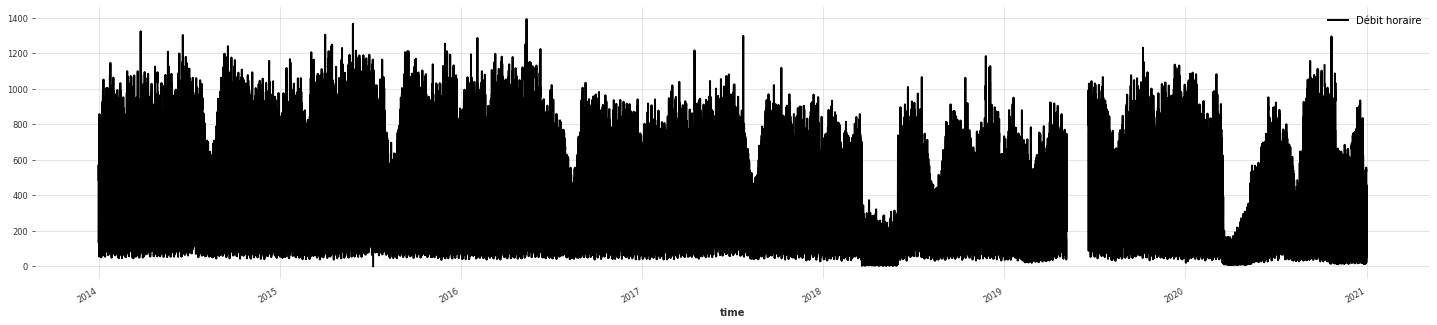

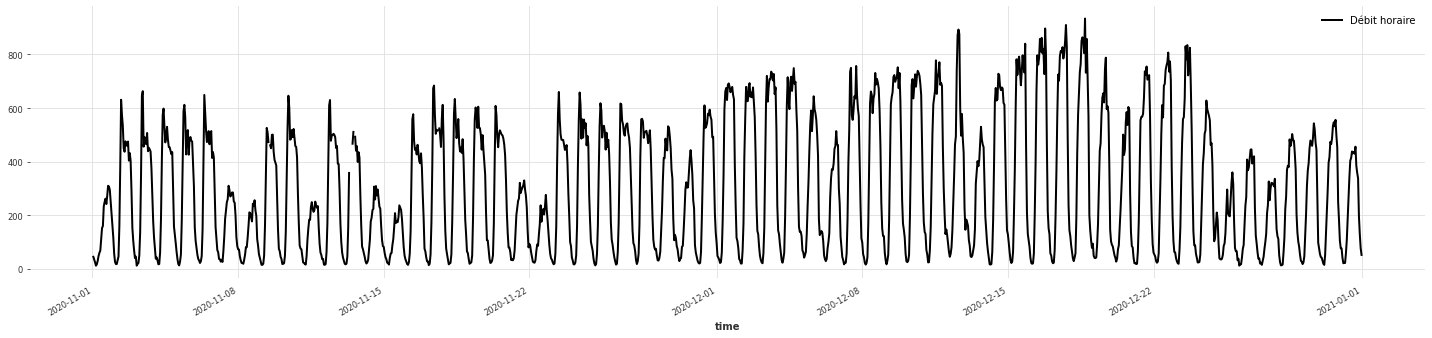

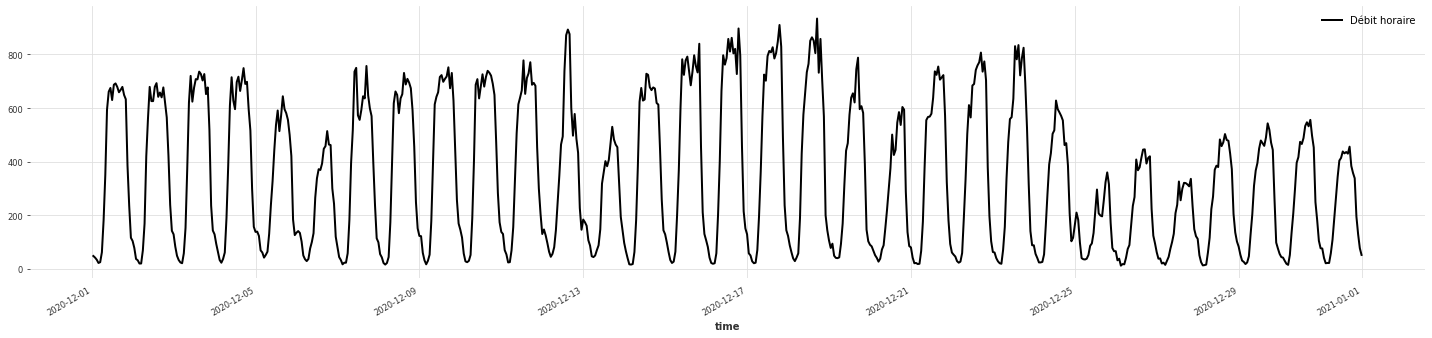

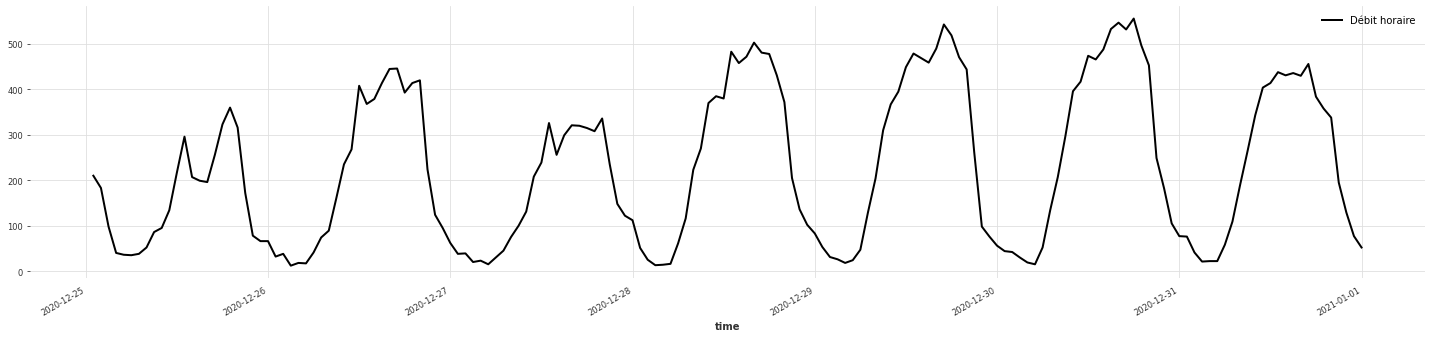

In [ ]:
plt.rcParams['figure.figsize'] = [25, 5]
ts.univariate_component(0).plot(label='Débit horaire')
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

#### taux d'occupation

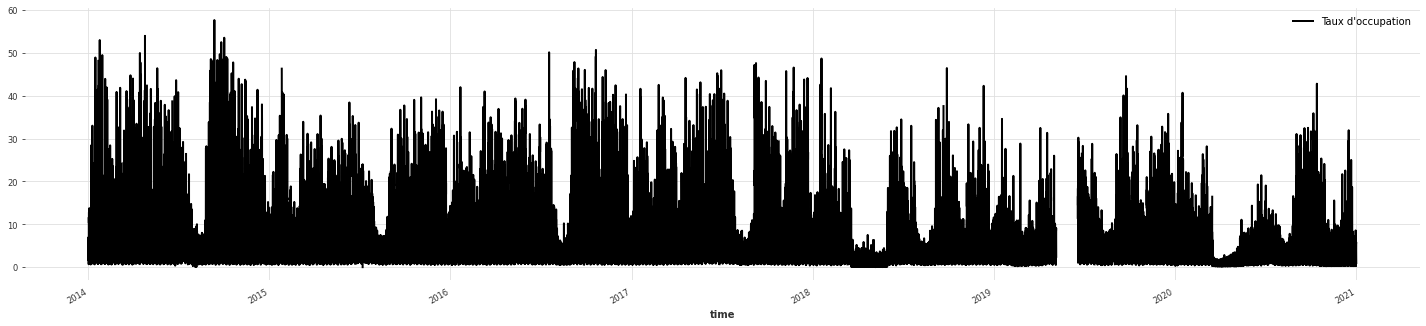

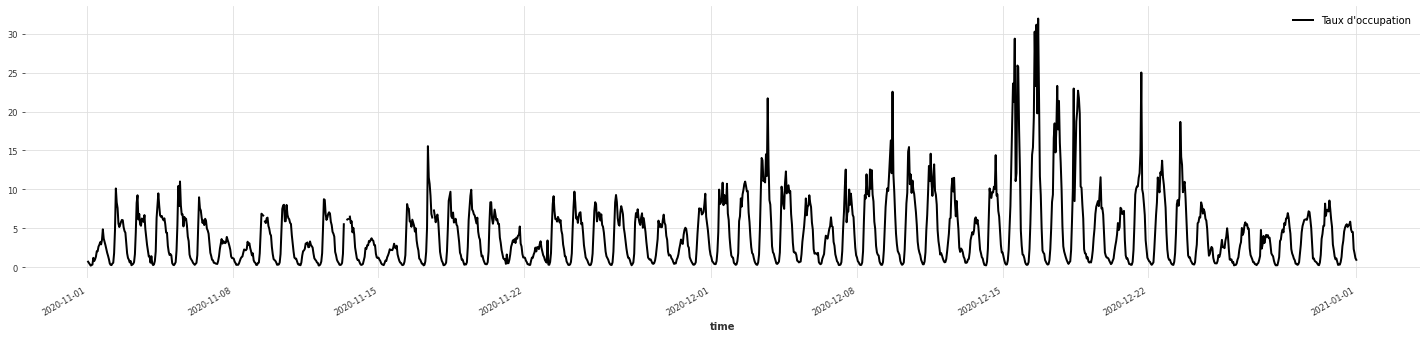

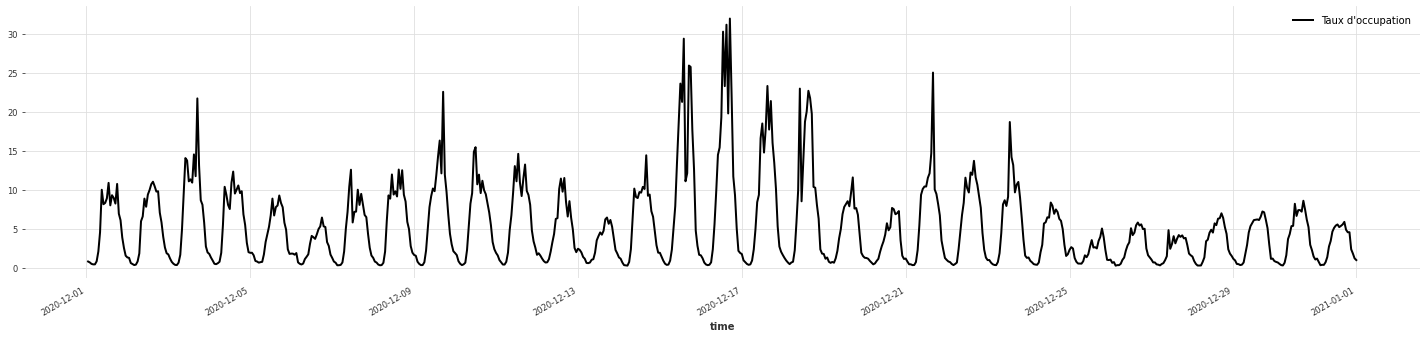

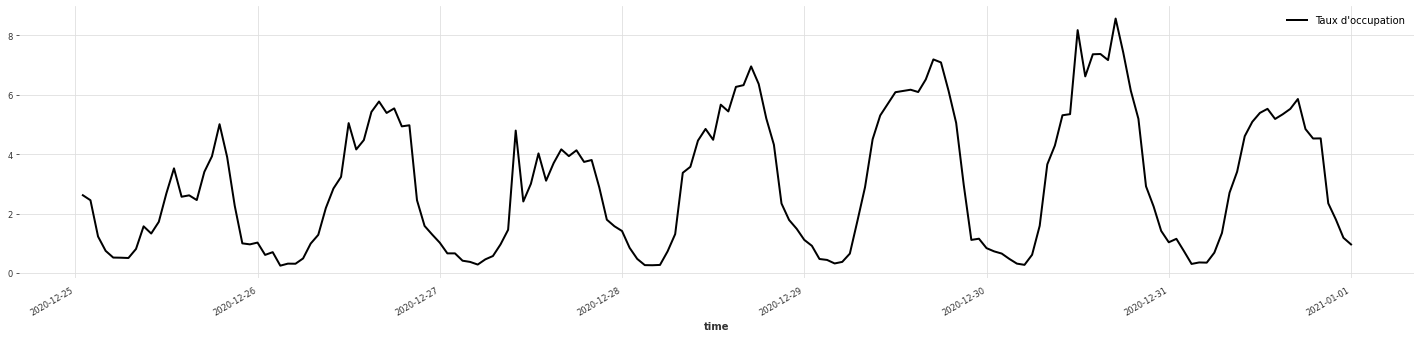

In [ ]:
# plot component of index 0 after 2021-11-04 
ts.univariate_component(1).plot(label="Taux d'occupation")
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)

#### effet etat_barre

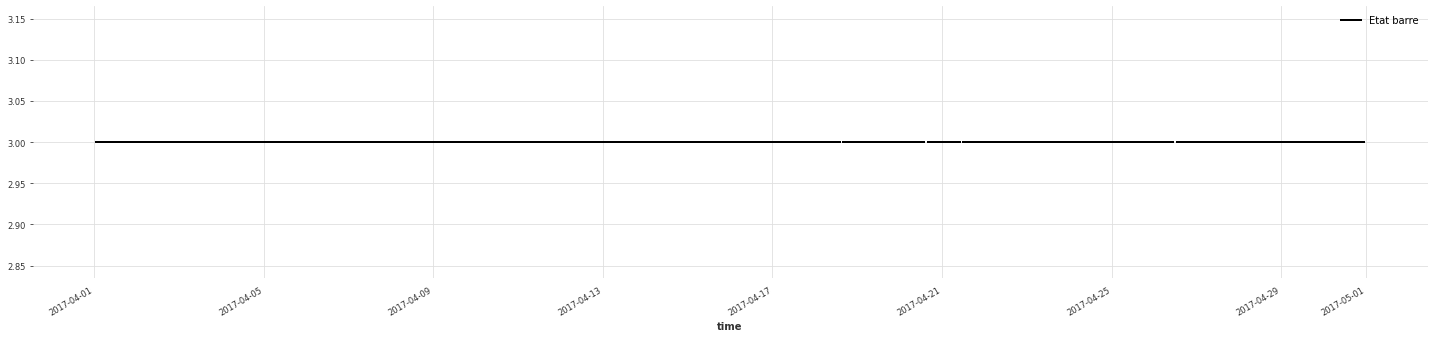

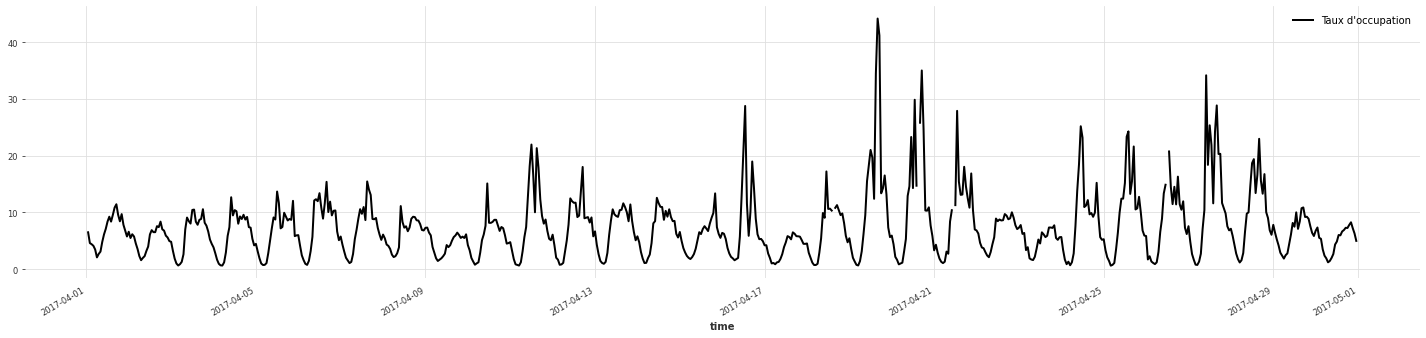

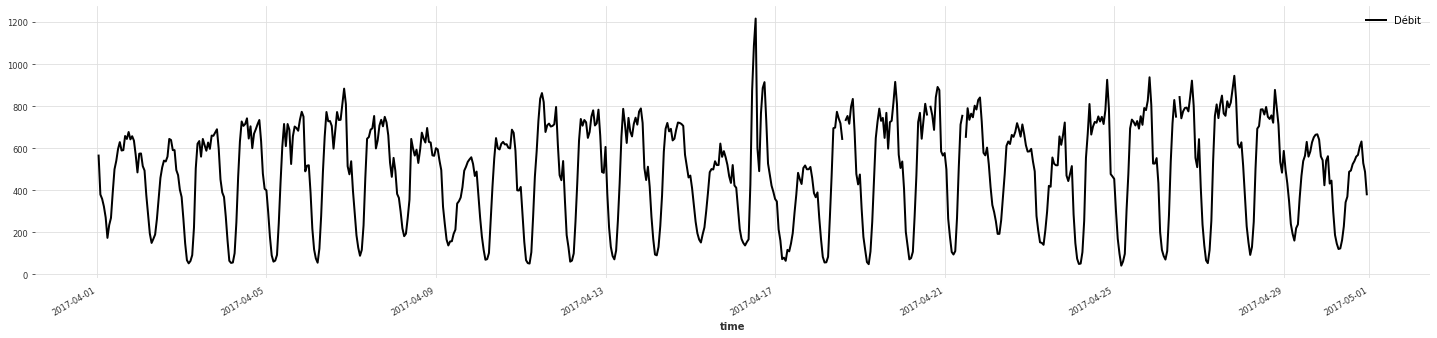

In [ ]:
ts.univariate_component(2).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Etat barre")
ts.univariate_component(1).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Taux d'occupation", new_plot=True)
ts.univariate_component(0).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Débit", new_plot=True)


Saisonnalités:
* chaque année ?
* chaque mois
* chaque jour

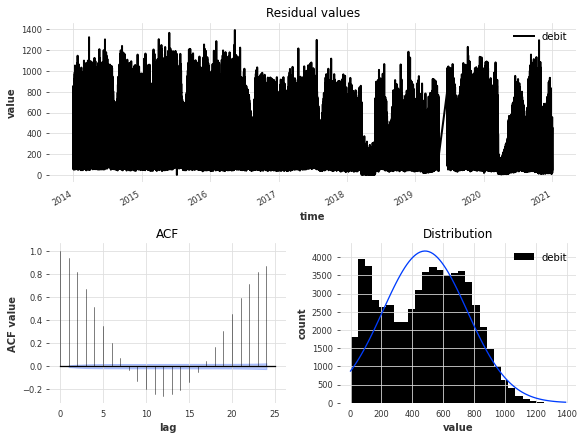

In [ ]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis, plot_hist, extract_trend_and_seasonality
plot_residuals_analysis(ts.univariate_component(0), num_bins=30)

In [ ]:
df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2014-01-01 01:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,486.0,6.17889,3
2014-01-01 02:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,571.0,6.66222,3
2014-01-01 03:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,532.0,5.56611,3
2014-01-01 04:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,458.0,4.63444,3
2014-01-01 05:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,386.0,3.94500,3
...,...,...,...,...,...,...
2020-12-31 20:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,338.0,4.53334,3
2020-12-31 21:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,195.0,2.34556,3
2020-12-31 22:00:00,Sts_Peres,Sts_Peres-Voltaire,Sts_Peres-Universite,129.0,1.80222,3


In [ ]:
# save df
df.to_csv("data/sts_peres-2014-2020.csv")

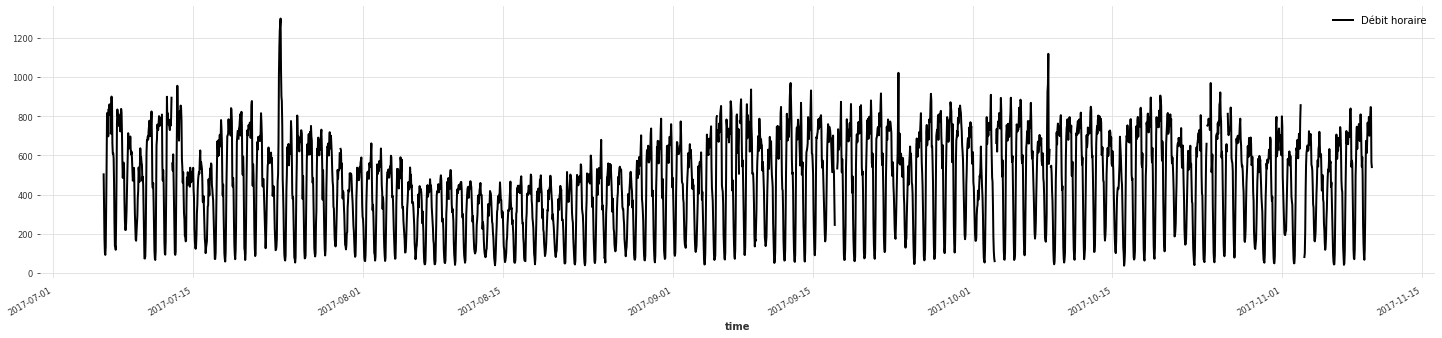

In [ ]:
tdf = ts.pd_dataframe()
ts.drop_before(pd.Timestamp("2017-07-06")).drop_after(pd.Timestamp("2017-11-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [ ]:
tdf.isna().sum()

component
debit         1650
occupation    1650
etat_barre    1650
dtype: int64

In [ ]:
# fill missing values in tdf (only 3 consecutive hours)
tdf.interpolate(method='linear', limit=3, inplace=True)
tdf.isna().sum()

component
debit         1194
occupation    1194
etat_barre    1194
dtype: int64

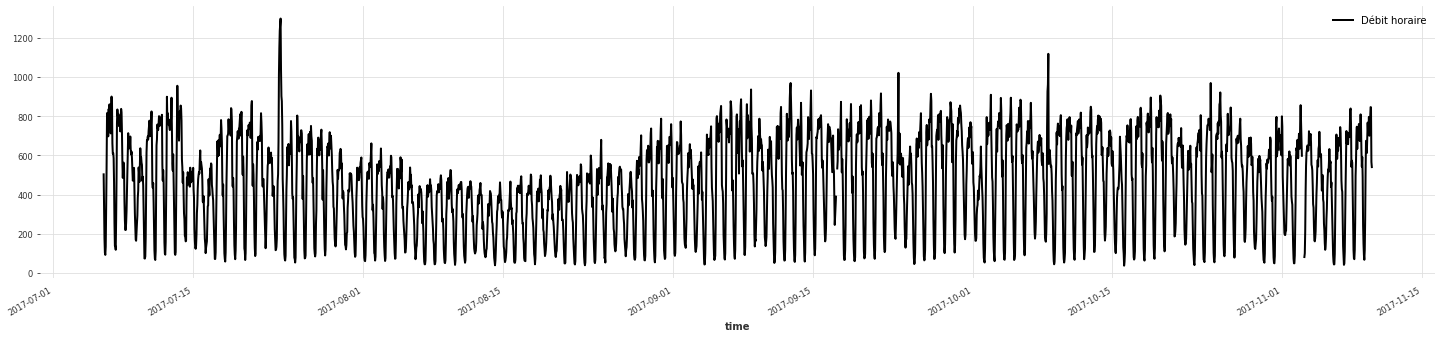

In [ ]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2017-07-06")).drop_after(pd.Timestamp("2017-11-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

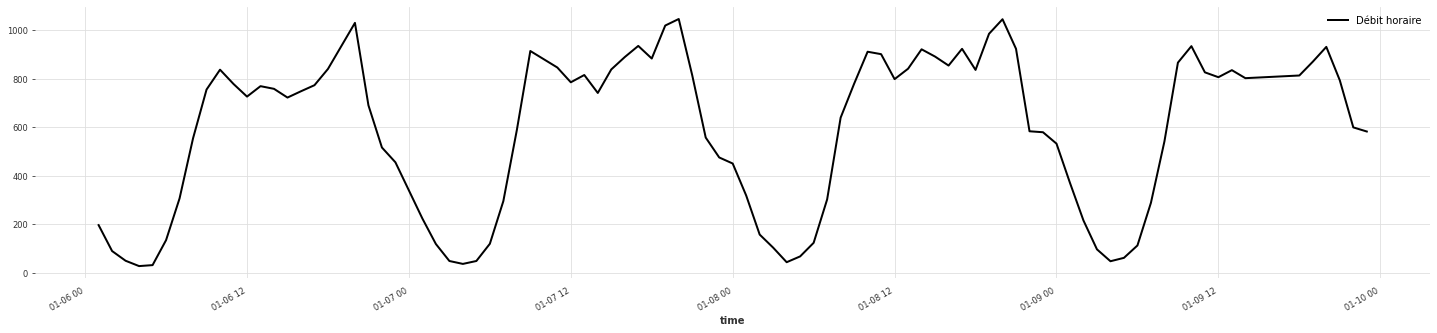

In [ ]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2020-01-06")).drop_after(pd.Timestamp("2020-01-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [ ]:
tdf.to_csv("data/sts_peres-2014-2020-proc.csv")

## Convention

### load data

In [ ]:
# read txt files from folder
from tqdm import tqdm
import glob
import pandas as pd
# Get folder path containing text files
file_list = glob.glob("data/opendata_txt_*/*.txt")

useful_columns = ["libelle", "libelle_nd_amont", "libelle_nd_aval", "t_1h", "q", "k"] # drop rows with these missing values
keep_columns = useful_columns + ["etat_barre"]

# select arcs to filter by
amont = ["Lecourbe-Convention", "Sts_Peres-Voltaire"]
aval = ["Convention-Blomet", "Sts_Peres-Universite"]


all_df = pd.DataFrame()
for file_path in tqdm(file_list):
    df =  pd.read_csv(file_path, delimiter=";")
    df = df[keep_columns]
    # drop rows where q or k is null
    df.dropna(subset=useful_columns, inplace=True)
    for amont_arc, aval_arc in zip(amont, aval):
        # filter by amont and aval arcs
        df = df[(df["libelle_nd_amont"] == amont_arc) & (df["libelle_nd_aval"] == aval_arc)]
        all_df = all_df.append(df)
    
all_df.rename(columns={"libelle": "arc", "libelle_nd_amont": "noeud_amont", "libelle_nd_aval": "noeud_aval", "q":"debit", "k":"occupation", "t_1h":"time"}, inplace=True)
all_df.drop_duplicates(subset=["arc", "noeud_amont", "noeud_aval", "time"], keep="first", inplace=True)
all_df

100%|██████████| 437/437 [16:42<00:00,  2.29s/it]


,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
68904,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 01:00:00,205.0,2.25945,3
68905,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 02:00:00,283.0,3.25111,3
68906,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 03:00:00,309.0,3.36000,3
68907,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 04:00:00,277.0,3.01445,3
68908,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 05:00:00,270.0,2.94889,3
...,...,...,...,...,...,...,...
214483,Convention,Lecourbe-Convention,Convention-Blomet,2020-12-31 20:00:00,821.0,5.88389,3
214484,Convention,Lecourbe-Convention,Convention-Blomet,2020-12-31 21:00:00,373.0,2.06056,3
214485,Convention,Lecourbe-Convention,Convention-Blomet,2020-12-31 22:00:00,277.0,1.39556,3
214486,Convention,Lecourbe-Convention,Convention-Blomet,2020-12-31 23:00:00,153.0,0.94778,3


In [ ]:
# select arcs to work with
amont = ["Lecourbe-Convention"]
aval = ["Convention-Blomet"]

df = pd.DataFrame()
for amont_arc, aval_arc in zip(amont, aval):
    # filter by amont and aval arcs
    df = df.append(all_df[(all_df["noeud_amont"] == amont_arc) & (all_df["noeud_aval"] == aval_arc)])
print(df['arc'].unique())
# df.drop_duplicates(inplace=True)
df

['Convention']


,arc,noeud_amont,noeud_aval,time,debit,occupation,etat_barre
68904,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 01:00:00,205.0,2.25945,3
68905,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 02:00:00,283.0,3.25111,3
68906,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 03:00:00,309.0,3.36000,3
68907,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 04:00:00,277.0,3.01445,3
68908,Convention,Lecourbe-Convention,Convention-Blomet,2014-01-01 05:00:00,270.0,2.94889,3
...,...,...,...,...,...,...,...
214483,Convention,Lecourbe-Convention,Convention-Blomet,2020-12-31 20:00:00,821.0,5.88389,3
214484,Convention,Lecourbe-Convention,Convention-Blomet,2020-12-31 21:00:00,373.0,2.06056,3
214485,Convention,Lecourbe-Convention,Convention-Blomet,2020-12-31 22:00:00,277.0,1.39556,3
214486,Convention,Lecourbe-Convention,Convention-Blomet,2020-12-31 23:00:00,153.0,0.94778,3


In [ ]:
import pandas as pd
time_col = "time"
value_cols = ['debit', "occupation", "etat_barre"]
# set datetime index
# df[time_col] = pd.to_datetime(df[time_col], utc=True).dt.tz_localize(None)
df[time_col] = pd.to_datetime(df[time_col])
df[time_col] = pd.DatetimeIndex(df[time_col])
df = df.set_index(time_col)
df

,arc,noeud_amont,noeud_aval,debit,occupation,etat_barre
time,,,,,,
2014-01-01 01:00:00,Convention,Lecourbe-Convention,Convention-Blomet,205.0,2.25945,3
2014-01-01 02:00:00,Convention,Lecourbe-Convention,Convention-Blomet,283.0,3.25111,3
2014-01-01 03:00:00,Convention,Lecourbe-Convention,Convention-Blomet,309.0,3.36000,3
2014-01-01 04:00:00,Convention,Lecourbe-Convention,Convention-Blomet,277.0,3.01445,3
2014-01-01 05:00:00,Convention,Lecourbe-Convention,Convention-Blomet,270.0,2.94889,3
...,...,...,...,...,...,...
2020-12-31 20:00:00,Convention,Lecourbe-Convention,Convention-Blomet,821.0,5.88389,3
2020-12-31 21:00:00,Convention,Lecourbe-Convention,Convention-Blomet,373.0,2.06056,3
2020-12-31 22:00:00,Convention,Lecourbe-Convention,Convention-Blomet,277.0,1.39556,3


In [ ]:
df.iloc[0]

arc                     Convention
noeud_amont    Lecourbe-Convention
noeud_aval       Convention-Blomet
debit                        205.0
occupation                 2.25945
etat_barre                       3
Name: 2014-01-01 01:00:00, dtype: object

In [ ]:
df.iloc[-1]

arc                     Convention
noeud_amont    Lecourbe-Convention
noeud_aval       Convention-Blomet
debit                         99.0
occupation                 0.60334
etat_barre                       3
Name: 2021-01-01 00:00:00, dtype: object

In [ ]:
df.describe()

,debit,occupation,etat_barre
count,60230.000000,60230.000000,60230.000000
mean,500.320488,6.617053,2.999834
std,310.238886,8.237927,0.012884
min,8.000000,0.016670,2.000000
25%,222.000000,1.650140,3.000000
50%,481.000000,3.789725,3.000000
75%,753.000000,7.673612,3.000000
max,1386.000000,65.470000,3.000000


In [ ]:
from darts import TimeSeries

# transform data to TimeSeries
ts = TimeSeries.from_dataframe(df, 
                          value_cols=value_cols,
                          fill_missing_dates=True,
                          freq='H'
                          )
ts

<TimeSeries (DataArray) (time: 61368, component: 3, sample: 1)>
array([[[205.     ],
        [  2.25945],
        [  3.     ]],

       [[283.     ],
        [  3.25111],
        [  3.     ]],

       [[309.     ],
        [  3.36   ],
        [  3.     ]],

       ...,

       [[277.     ],
        [  1.39556],
        [  3.     ]],

       [[153.     ],
        [  0.94778],
        [  3.     ]],

       [[ 99.     ],
        [  0.60334],
        [  3.     ]]])
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01T01:00:00 ... 2021-01-01
  * component  (component) object 'debit' 'occupation' 'etat_barre'
Dimensions without coordinates: sample

#### Débit horaire

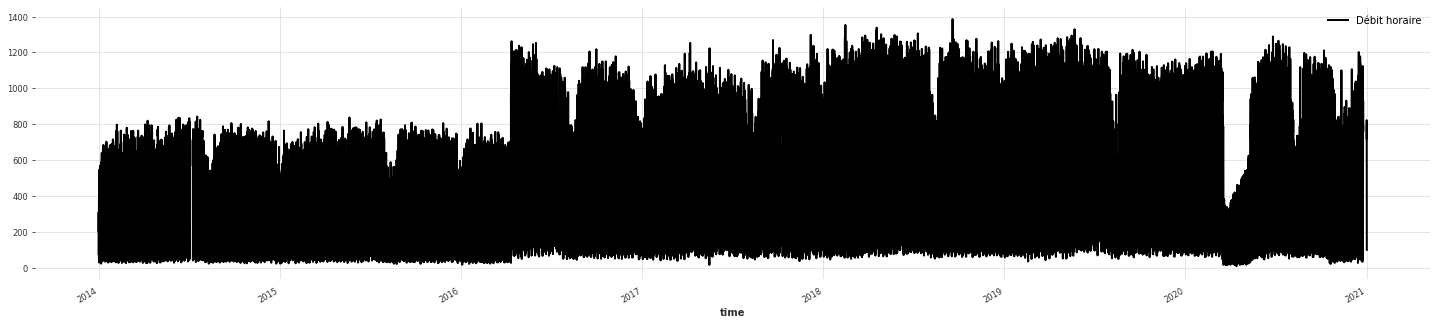

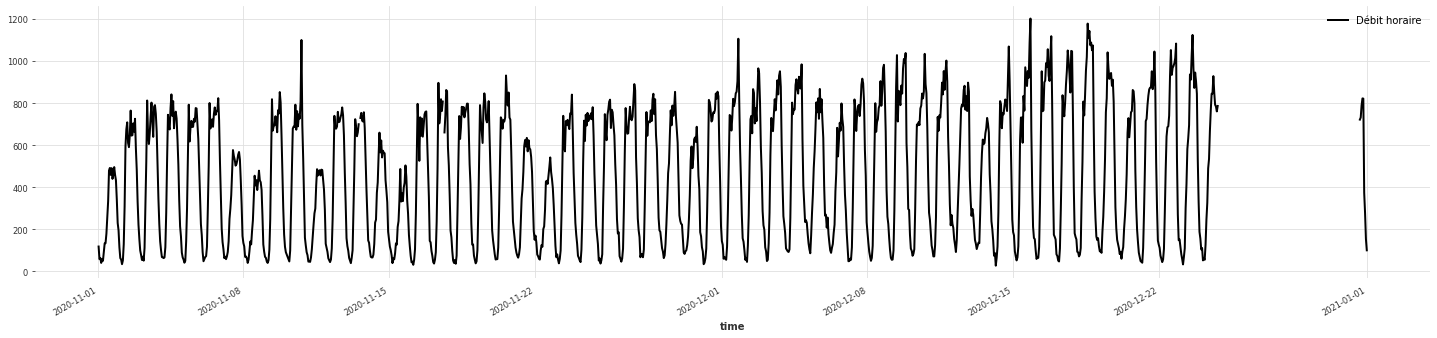

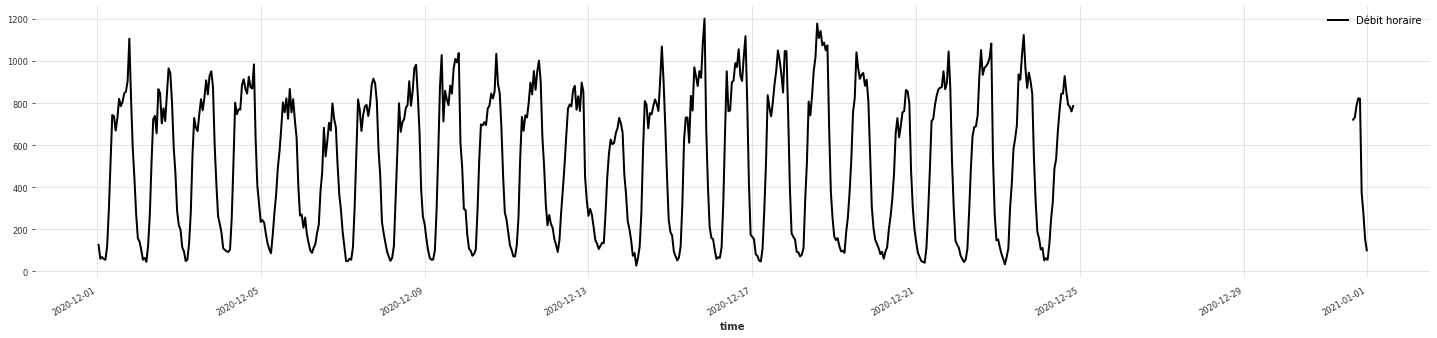

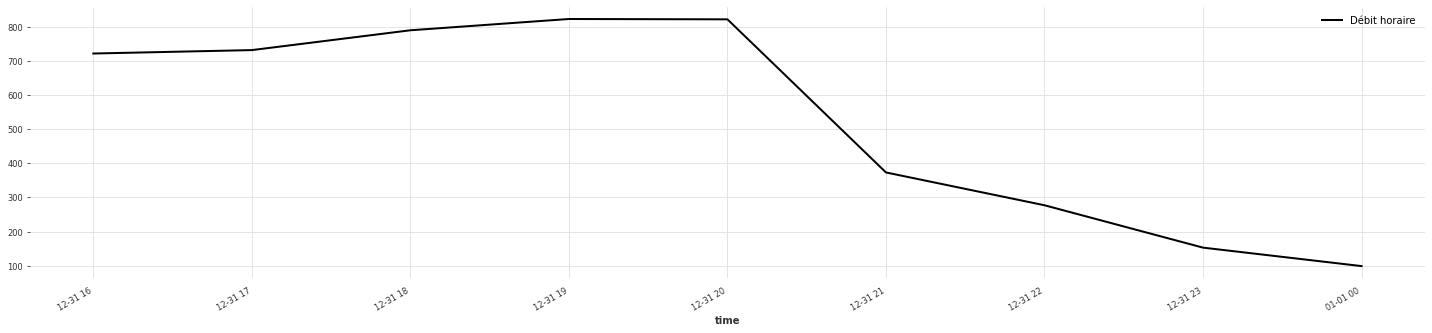

In [ ]:
plt.rcParams['figure.figsize'] = [25, 5]
ts.univariate_component(0).plot(label='Débit horaire')
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(0).plot(label='Débit horaire', new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

#### taux d'occupation

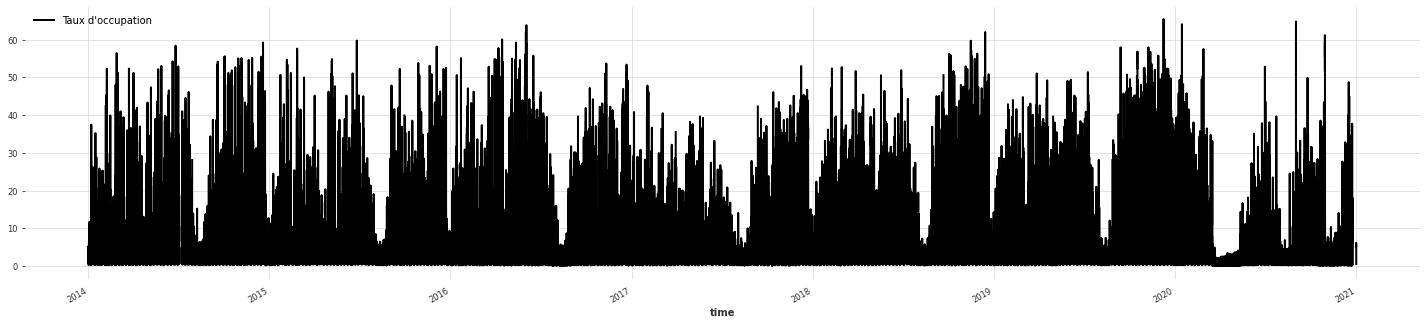

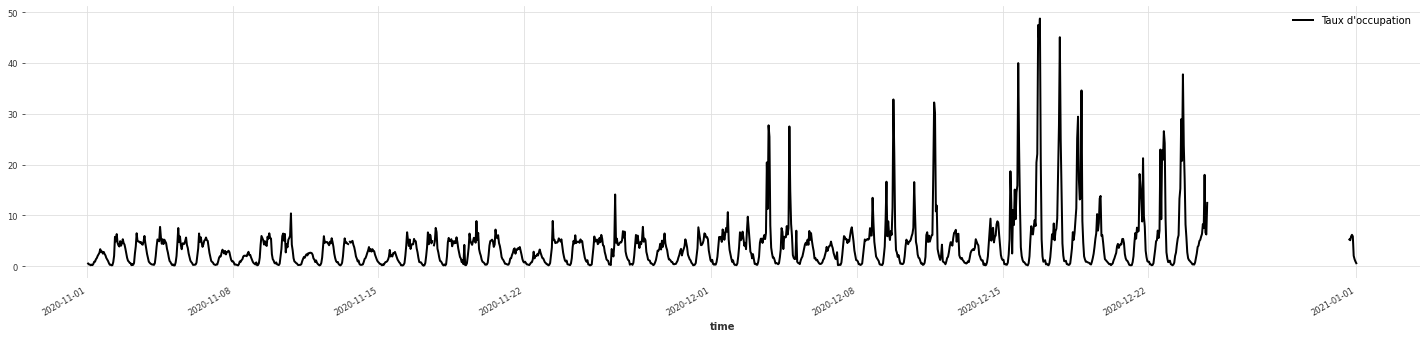

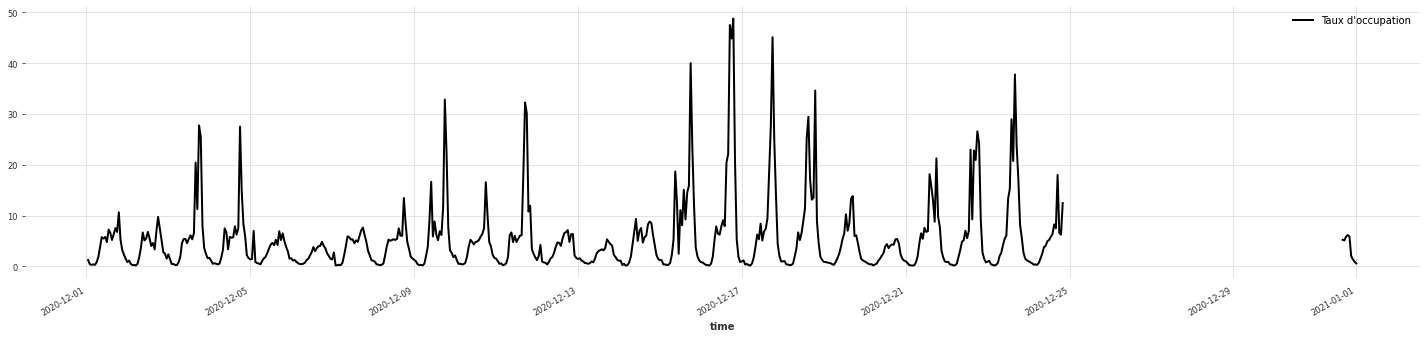

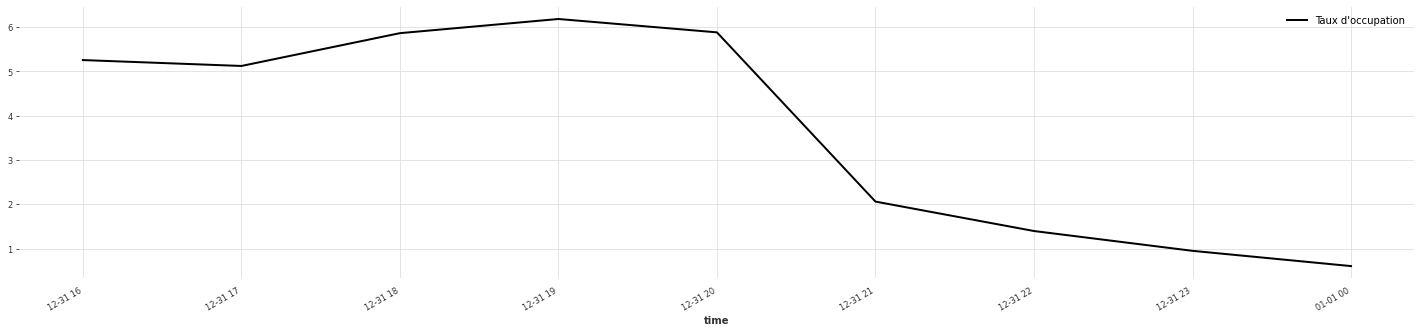

In [ ]:
# plot component of index 0 after 2021-11-04 
ts.univariate_component(1).plot(label="Taux d'occupation")
ts.drop_before(pd.Timestamp("2020-11-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-01")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)
ts.drop_before(pd.Timestamp("2020-12-25")).univariate_component(1).plot(label="Taux d'occupation", new_plot=True)

#### effet etat_barre

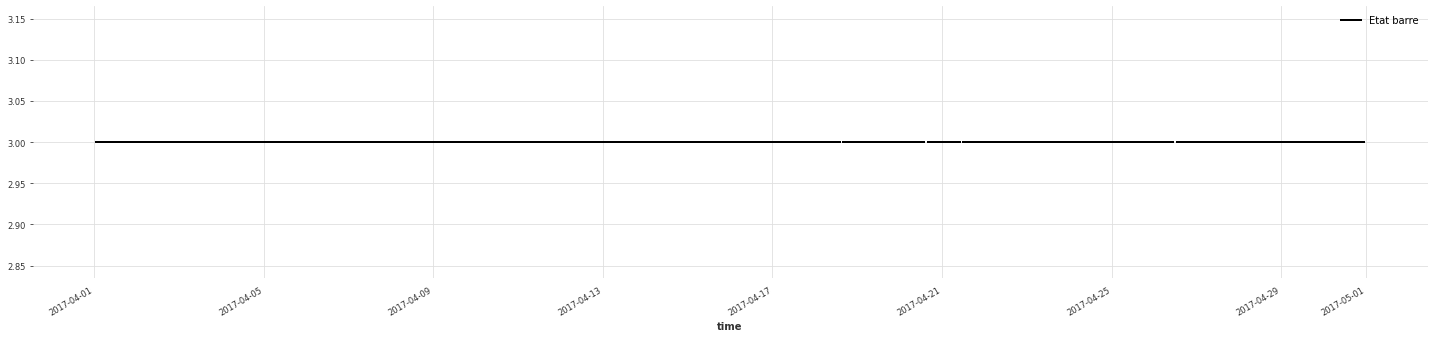

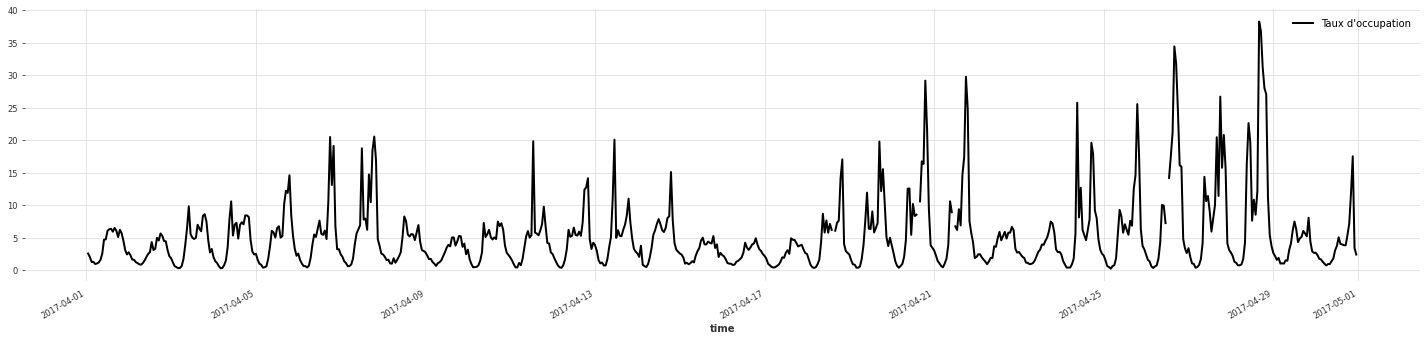

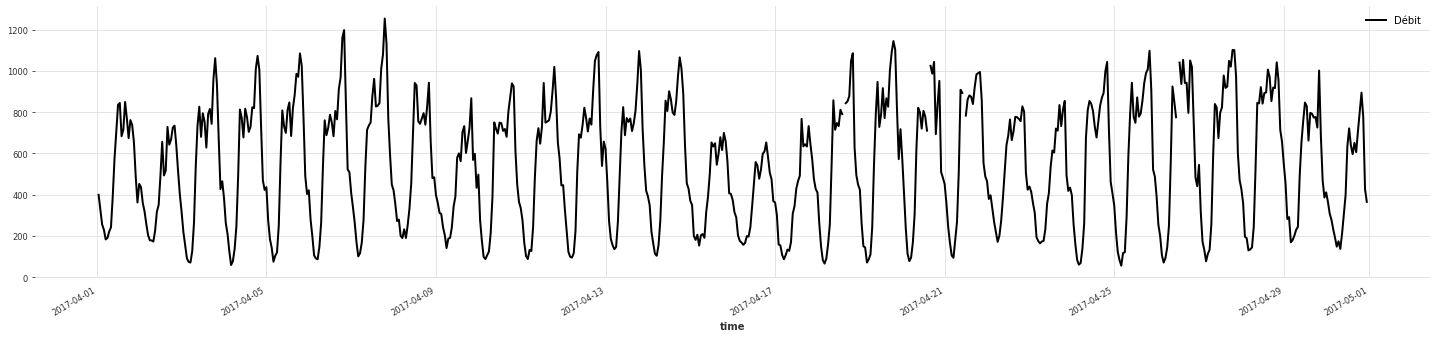

In [ ]:
ts.univariate_component(2).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Etat barre")
ts.univariate_component(1).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Taux d'occupation", new_plot=True)
ts.univariate_component(0).drop_before(pd.Timestamp("2017-04-01")).drop_after(pd.Timestamp("2017-05-01")).plot(label="Débit", new_plot=True)


Saisonnalités:
* chaque année ?
* chaque mois
* chaque jour

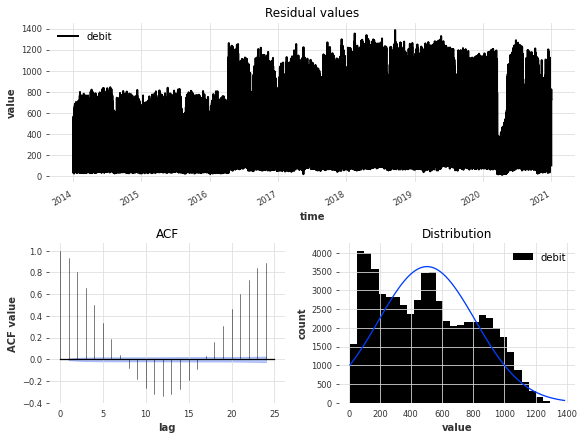

In [ ]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis, plot_hist, extract_trend_and_seasonality
plot_residuals_analysis(ts.univariate_component(0), num_bins=30)

In [ ]:
# save df
df.to_csv("data/convention-2014-2020.csv")

In [ ]:
ts = ts_orig

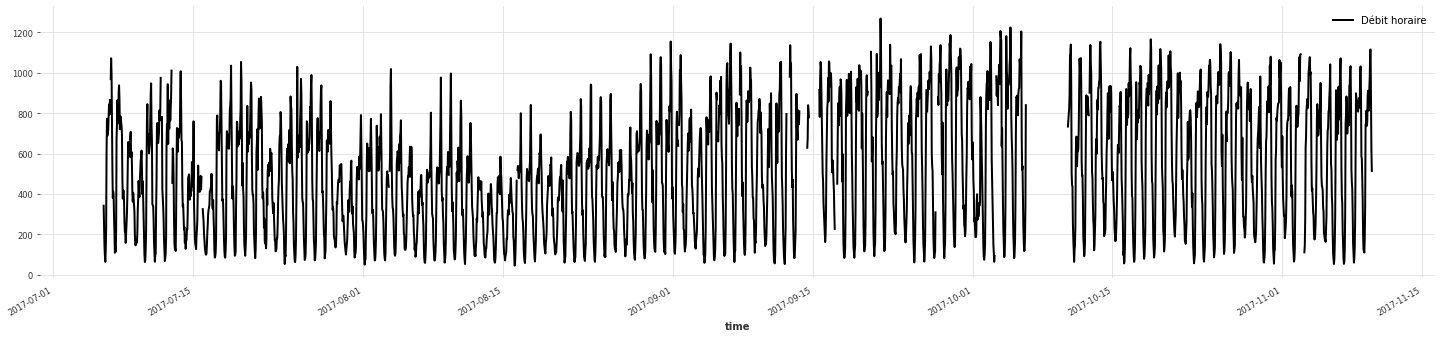

In [ ]:
tdf = ts.pd_dataframe()
ts.drop_before(pd.Timestamp("2017-07-06")).drop_after(pd.Timestamp("2017-11-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [ ]:
tdf.isna().sum()

component
debit         1138
occupation    1138
etat_barre    1138
dtype: int64

In [ ]:
# fill missing values in tdf (only 3 consecutive hours)
tdf.interpolate(method='linear', limit=3, inplace=True)
tdf.isna().sum()

component
debit         646
occupation    646
etat_barre    646
dtype: int64

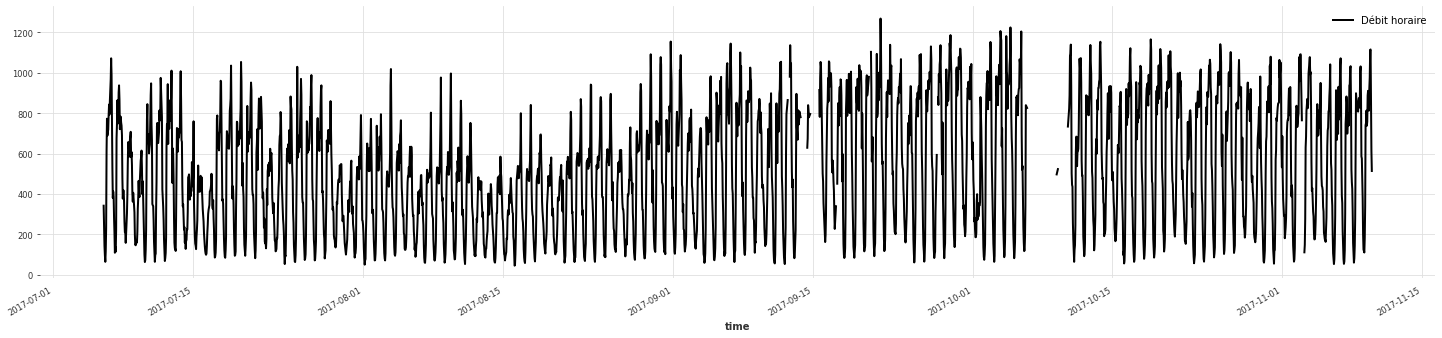

In [ ]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2017-07-06")).drop_after(pd.Timestamp("2017-11-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

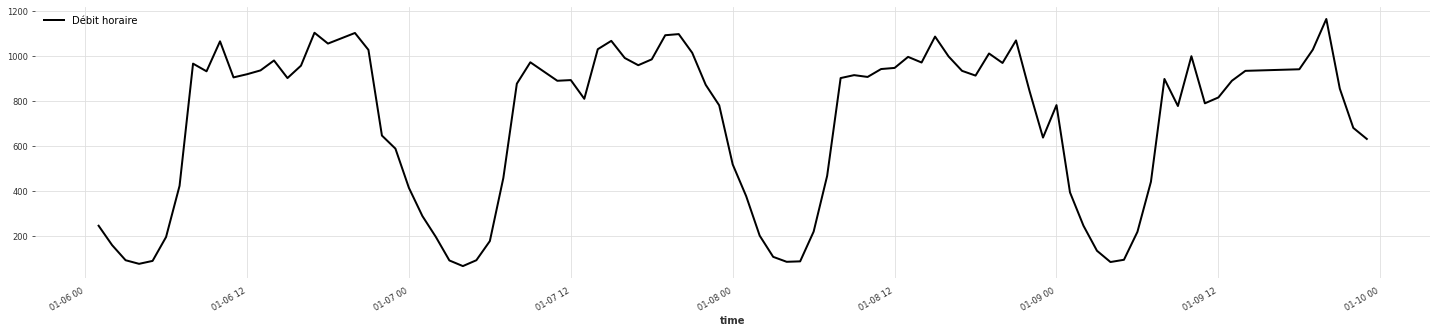

In [ ]:
ts = TimeSeries.from_dataframe(tdf)
ts.drop_before(pd.Timestamp("2020-01-06")).drop_after(pd.Timestamp("2020-01-10")).univariate_component(0).plot(label='Débit horaire', new_plot=True)

In [ ]:
tdf.to_csv("data/convention-2014-2020-proc.csv")